In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
pd.read_csv("/data/startups.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          48 non-null float64
Administration     50 non-null float64
Marketing Spend    47 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [6]:
target = "charges"

In [7]:
y = df[target]

In [8]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
6        8240.58960
7        7281.50560
8        6406.41070
9       28923.13692
10       2721.32080
11      27808.72510
12       1826.84300
13      11090.71780
14      39611.75770
15       1837.23700
16      10797.33620
17       2395.17155
18      10602.38500
19      36837.46700
20      13228.84695
21       4149.73600
22       1137.01100
23      37701.87680
24       6203.90175
25      14001.13380
26      14451.83515
27      12268.63225
28       2775.19215
29      38711.00000
           ...     
1308    33900.65300
1309     6875.96100
1310     6940.90985
1311     4571.41305
1312     4536.25900
1313    36397.57600
1314    18765.87545
1315    11272.33139
1316     1731.67700
1317     1163.46270
1318    19496.71917
1319     7201.70085
1320     5425.02335
1321    28101.33305
1322    12981.34570
1323    43896.37630
1324     4239.89265
1325    13143.33665
1326     7050.02130


In [8]:
X = df.drop(columns=[target])
X.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [9]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
# One hot encoding
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.head()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [13]:
from sklearn import model_selection

In [14]:
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)

In [15]:
X_train.shape

(936, 8)

In [18]:
936/len(df)

0.6995515695067265

In [16]:
from sklearn import preprocessing

In [17]:
X_train.dtype

dtype('float64')

In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # finds mean and std for each column in X

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaler.mean_

array([38.82264957, 30.68218483,  1.10470085,  0.51175214,  0.20619658,
        0.23824786,  0.26495726,  0.25641026])

In [43]:
scaler.scale_

array([14.02160116,  6.08474408,  1.22201114,  0.49986187,  0.4045733 ,
        0.42601152,  0.44131045,  0.43665093])

In [19]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
X_train_std

array([[ 0.79715222, -0.70211414, -0.90400228, ...,  1.78810218,
        -0.60038747, -0.58722022],
       [-1.27108519, -0.70375759, -0.08567913, ..., -0.55925216,
        -0.60038747,  1.70293864],
       [-0.98581107, -0.73333977, -0.90400228, ..., -0.55925216,
        -0.60038747, -0.58722022],
       ...,
       [ 0.86847075,  0.70303946,  0.73264401, ..., -0.55925216,
        -0.60038747, -0.58722022],
       [ 0.0839669 , -1.39072157,  0.73264401, ..., -0.55925216,
         1.66559105, -0.58722022],
       [ 1.29638193, -0.4506656 , -0.08567913, ..., -0.55925216,
         1.66559105, -0.58722022]])

In [45]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.791065e-16,-4.635418e-16,-2.910332e-16,1.767342e-17,8.979047e-17,-1.088873e-16,4.886879e-17,-2.372271e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [21]:
from sklearn import linear_model

In [22]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [54]:
error_training = y_train_pred - y_train

sse_training = (error_training ** 2).sum()
sse_training

34142276155.204025

In [52]:
error_test = y_test_pred - y_test

sse_test = (error_test ** 2).sum()
sse_test

14778105453.509336

In [55]:
sse_training/sse_test

2.3103283612782928

In [56]:
mse_train = sse_training/len(y_train)

In [57]:
mse_test = sse_test/len(y_test)

In [58]:
mse_train/mse_test

0.9922564115746513

In [59]:
from sklearn import metrics

In [61]:
mse_test = metrics.mean_squared_error(y_test, y_test_pred)

In [62]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)

In [24]:
mse_train/mse_test

NameError: name 'mse_train' is not defined

In [25]:
lr.intercept_

13276.698553898497

In [26]:
lr.coef_

array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
       9733.78688309, -129.54588605, -414.54148288, -379.09534369])

In [27]:
pd.DataFrame(dict(features = X_dummy.columns, coefficient = lr.coef_ ))

,features,coefficient
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [28]:
pd.DataFrame(dict(actual = y_test, prediction = y_test_pred  ))

,actual,prediction
559,1646.42970,4610.315541
1087,11353.22760,12887.893880
1020,8798.59300,12573.948752
460,10381.47870,13197.836626
802,2103.08000,629.337182
298,38746.35510,32357.257584
481,9304.70190,12853.778438
616,11658.11505,12273.662540
763,3070.80870,3865.164045
750,19539.24300,29904.111392


In [30]:
import numpy as np

In [31]:
sst = ((y_test - np.mean(y_train)) ** 2).mean()
sst

141717109.2996249

In [33]:
sse = ((y_test - y_test_pred) ** 2).mean()
sse

36761456.35201327

In [34]:
sse/sst

0.2594002695488975

In [35]:
r2 = 1 - sse/sst

In [36]:
r2

0.7405997304511025

In [38]:
from sklearn import *

In [40]:
target = "charges"
y = df[target]
X = df.drop(columns=[target])
# One hot encoding
X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)
    
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)


y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("rmse of training", rmse_train)
print("rmse of test", rmse_test)
print("r2 of training", r2_train)
print("r2 of test", r2_test)


rmse of training 6039.6018713245385
rmse of test 6063.122656850453
r2 of training 0.7545557492633161
r2 of test 0.7405989316927208


In [43]:
%matplotlib inline

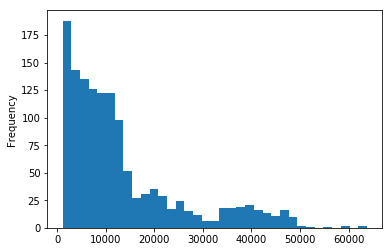

In [45]:
df.charges.plot.hist(bins = 35)

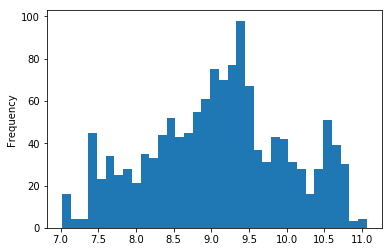

In [46]:
np.log(df.charges).plot.hist(bins = 35)

In [53]:
target = "charges"
y = np.log(df[target])
#y = df[target]
X = df.drop(columns=[target])
X["age_group"] = np.where(df.age>60, 1, 0)
X["high_bmi"] = np.where(df.bmi>30, 1, 0)
# One hot encoding
X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("rmse of training", rmse_train)
print("rmse of test", rmse_test)
print("r2 of training", r2_train)
print("r2 of test", r2_test)


rmse of training 0.4498838059976355
rmse of test 0.42023970729428595
r2 of training 0.7608907031255225
r2 of test 0.7900566633733725


In [50]:
pd.DataFrame(dict(actual =df.charges, log =  np.log(df.charges)))

,actual,log
0,16884.92400,9.734176
1,1725.55230,7.453302
2,4449.46200,8.400538
3,21984.47061,9.998092
4,3866.85520,8.260197
5,3756.62160,8.231275
6,8240.58960,9.016827
7,7281.50560,8.893093
8,6406.41070,8.765054
9,28923.13692,10.272397


In [58]:
poly = preprocessing.PolynomialFeatures(degree=2)
a = np.array([
    [1, 2, 3],
    [-1, 0, 1],
    [4, 5, 0],
    [-2, -1, 0]
])

poly.fit_transform(a)

array([[ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 1., -1.,  0.,  1.,  1., -0., -1.,  0.,  0.,  1.],
       [ 1.,  4.,  5.,  0., 16., 20.,  0., 25.,  0.,  0.],
       [ 1., -2., -1.,  0.,  4.,  2., -0.,  1., -0.,  0.]])

In [60]:

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
a = np.array([
    [1, 2, 3],
    [-1, 0, 1],
    [4, 5, 0],
    [-2, -1, 0]
])

poly.fit_transform(a)


array([[ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [-1.,  0.,  1.,  1., -0., -1.,  0.,  0.,  1.],
       [ 4.,  5.,  0., 16., 20.,  0., 25.,  0.,  0.],
       [-2., -1.,  0.,  4.,  2., -0.,  1., -0.,  0.]])

In [63]:
poly = preprocessing.PolynomialFeatures(degree=3
                        , include_bias=False)

a = np.random.random((5, 100))
poly.fit_transform(a).shape

(5, 176850)

In [67]:
target = "charges"
y = np.log(df[target])
#y = df[target]
X = df.drop(columns=[target])
X["age_group"] = np.where(df.age>60, 1, 0)
X["high_bmi"] = np.where(df.bmi>30, 1, 0)
# One hot encoding
X_dummy = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X_dummy.values, y
                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("rmse of training", rmse_train)
print("rmse of test", rmse_test)
print("r2 of training", r2_train)
print("r2 of test", r2_test)


rmse of training 0.37395748281705865
rmse of test 0.3299381072855681
r2 of training 0.834788529494612
r2 of test 0.8705884967625366
